In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)
df=pd.read_csv('/kaggle/input/movies/movies.csv')
df = df[['budget','company','country','gross','name','rating','genre','year','released','director','writer']]
df.fillna(0, inplace=True)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['year_correct'] = df['released'].astype(str)
df['year_correct'] = df['year_correct'].str.split('(').str[0]
df['year_correct']=df['year_correct'].str.split(',').str[-1]
df.sort_values(by=['gross'],inplace=False,ascending=False)
pd.set_option('display.max_rows',20)


In [24]:
df.dtypes



budget           int64
company         object
country         object
gross            int64
name            object
                 ...  
year             int64
released        object
director        object
writer          object
year_correct    object
Length: 12, dtype: object

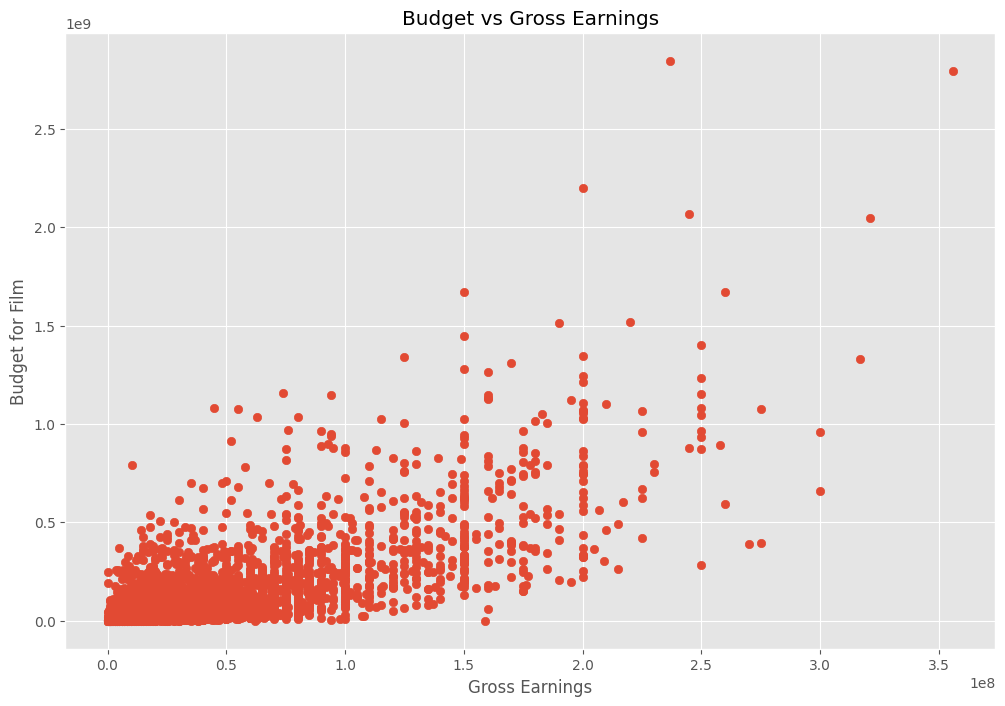

In [19]:
#Scatter Plot with budget v gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


In [29]:
df.head(10)

,budget,company,country,gross,name,rating,genre,year,released,director,writer,year_correct
0,19000000,Warner Bros.,United Kingdom,46998772,The Shining,R,Drama,1980,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,1980
1,4500000,Columbia Pictures,United States,58853106,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,83453539,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,39846344,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,1980
5,550000,Paramount Pictures,United States,39754601,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",Sean S. Cunningham,Victor Miller,1980
6,27000000,Universal Pictures,United States,115229890,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",John Landis,Dan Aykroyd,1980
7,18000000,Chartoff-Winkler Productions,United States,23402427,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",Martin Scorsese,Jake LaMotta,1980
8,54000000,Dovemead Films,United States,108185706,Superman II,PG,Action,1980,"June 19, 1981 (United States)",Richard Lester,Jerry Siegel,1981
9,10000000,United Artists,United States,15795189,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",Walter Hill,Bill Bryden,1980


<Axes: xlabel='budget', ylabel='gross'>

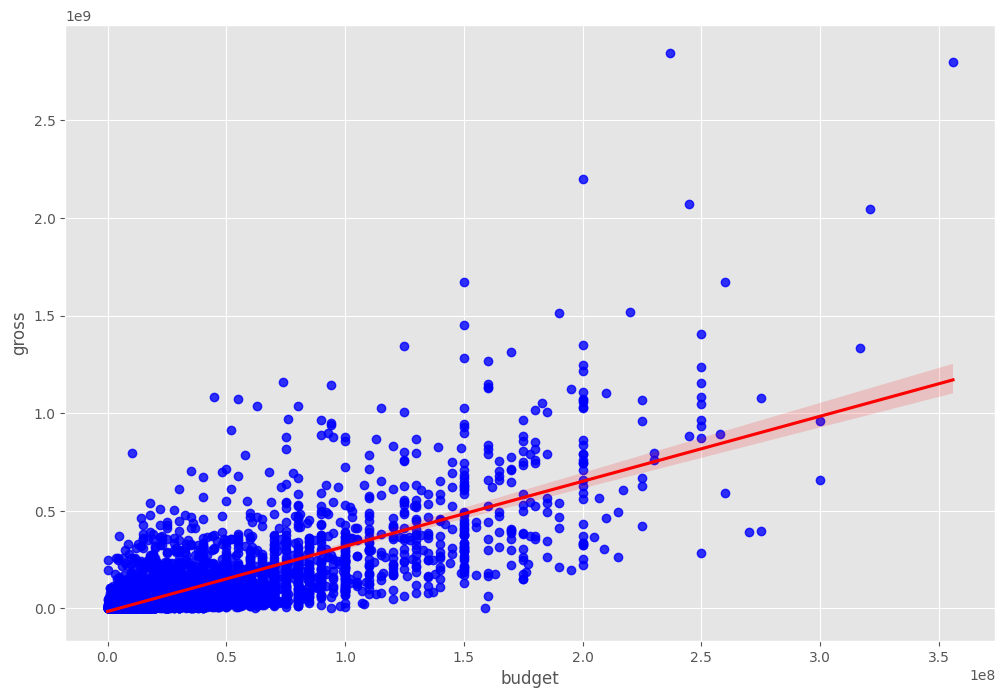

In [35]:
#Plot budget vs Gross  using seaborn

sns.regplot(x='budget', y='gross',data = df,scatter_kws={"color": "blue"},line_kws={"color" : "red"})

In [31]:
df.corr(numeric_only=True,method='spearman' )

,budget,gross,year
budget,1.000000,0.716816,0.291152
gross,0.716816,1.000000,0.314681
year,0.291152,0.314681,1.000000


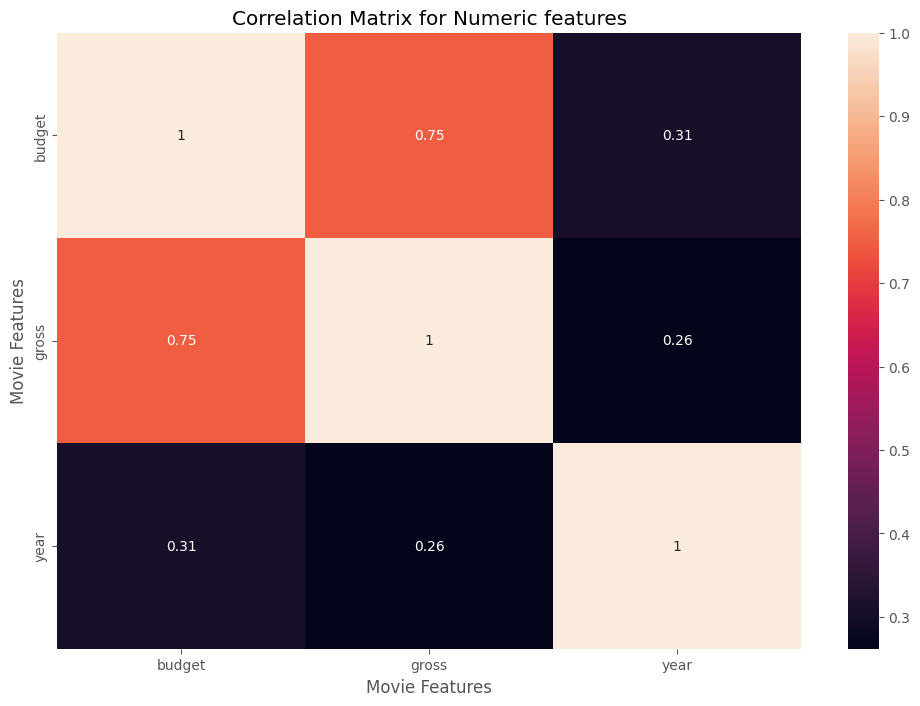

In [33]:
correlation_matrix=df.corr(numeric_only=True,method='pearson' )
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [34]:
df_numerized=df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

In [35]:
df_numerized

,budget,company,country,gross,name,rating,genre,year,released,director,writer,year_correct
0,19000000,2320,55,46998772,6587,7,6,1980,1706,2589,4015,0
1,4500000,732,56,58853106,5573,7,1,1980,1493,2269,1633,0
2,18000000,1541,56,538375067,5142,5,0,1980,1772,1111,2568,0
3,3500000,1813,56,83453539,286,5,4,1980,1493,1301,2001,0
4,6000000,1778,56,39846344,1027,7,4,1980,1544,1054,522,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000,0,56,0,3705,0,6,2020,2965,1500,2290,40
7664,0,540,56,0,1678,0,4,2020,1108,774,2615,40
7665,58750,942,56,0,4717,0,6,2020,194,2061,2684,40
7666,15000,0,56,0,2843,0,6,2020,2818,1184,1825,40


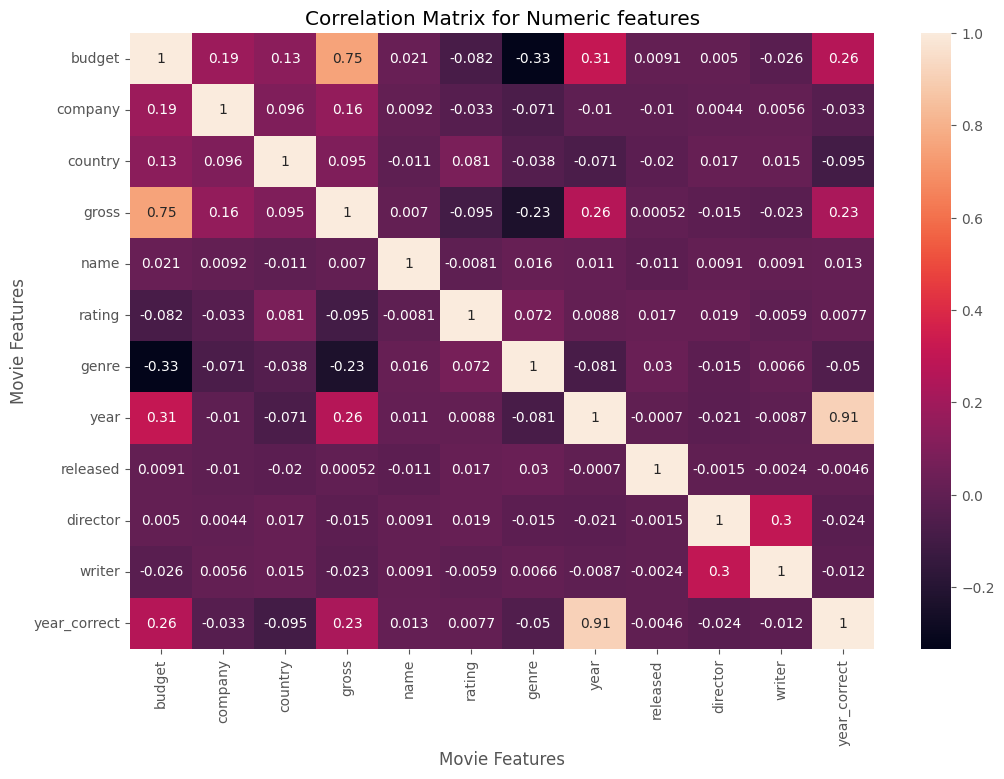

In [36]:
correlation_matrix=df_numerized.corr(numeric_only=True,method='pearson' )
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [51]:
df_numerized.corr()
df_numerized.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   budget        7668 non-null   int64
 1   company       7668 non-null   int16
 2   country       7668 non-null   int8 
 3   gross         7668 non-null   int64
 4   name          7668 non-null   int16
 5   rating        7668 non-null   int8 
 6   genre         7668 non-null   int8 
 7   year          7668 non-null   int64
 8   released      7668 non-null   int16
 9   director      7668 non-null   int16
 10  writer        7668 non-null   int16
 11  year_correct  7668 non-null   int8 
dtypes: int16(5), int64(3), int8(4)
memory usage: 284.7 KB


In [56]:
unst_matrix=df_numerized.corr()
corr_pairs=unst_matrix.unstack().head(20)

corr_pairs

budget   budget          1.000000
         company         0.186474
         country         0.131720
         gross           0.750157
         name            0.020548
         rating         -0.081939
         genre          -0.334021
         year            0.309212
         released        0.009145
         director        0.004976
         writer         -0.025911
         year_correct    0.262447
company  budget          0.186474
         company         1.000000
         country         0.095548
         gross           0.156745
         name            0.009211
         rating         -0.032943
         genre          -0.071067
         year           -0.010431
dtype: float64

In [57]:
sorted_pairs=corr_pairs.sort_values().head(20)
sorted_pairs

budget   genre          -0.334021
         rating         -0.081939
company  genre          -0.071067
         rating         -0.032943
budget   writer         -0.025911
company  year           -0.010431
budget   director        0.004976
         released        0.009145
company  name            0.009211
budget   name            0.020548
company  country         0.095548
budget   country         0.131720
company  gross           0.156745
         budget          0.186474
budget   company         0.186474
         year_correct    0.262447
         year            0.309212
         gross           0.750157
company  company         1.000000
budget   budget          1.000000
dtype: float64

In [60]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

budget   gross      0.750157
company  company    1.000000
budget   budget     1.000000
dtype: float64

In [ ]:
#Gross and Budget has high Correlation